# NEURO-105: Statistics and Probability using Python
## Lesson 2 - Friday 23/1/26

**Instructor:** Alexandros Pittis  
**Course:** MSc in Neurosciences, University of Crete

---

### Objectives
1. Finish Lesson 1 (Pandas)
2. Correlation analysis
3. Linear regression

---

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

print("Libraries loaded!")

Libraries loaded!


---
## Part 1: Working with the Penguins Dataset (built into seaborn)

We'll use a real dataset provided by seaborn: measurements of penguins from Palmer Station, Antarctica.

This dataset contains measurements of three species:
- Adelie
- Chinstrap  
- Gentoo

In [2]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Show first x rows
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguins[['species','sex']]

,species,sex
0,Adelie,Male
1,Adelie,Female
2,Adelie,Female
3,Adelie,NaN
4,Adelie,Female
...,...,...
339,Gentoo,NaN
340,Gentoo,Female
341,Gentoo,Male
342,Gentoo,Female


In [4]:
# How many rows and columns in total?
penguins.shape

(344, 7)

In [5]:
# Column names
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
penguins.index

RangeIndex(start=0, stop=344, step=1)

In [7]:
# Summary statistics
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Handling Missing Data

Real data often has missing values (NaN = "Not a Number").

In [8]:
# Check for missing values
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# Remove rows with missing values
penguins_clean = penguins.dropna()

print("Original:", len(penguins), "rows")
print("After dropna:", len(penguins_clean), "rows")

Original: 344 rows
After dropna: 333 rows


### Accessing Columns

In [10]:
# Get one column
penguins_clean['bill_length_mm']

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64

In [11]:
selection = ['species', 'bill_length_mm', 'body_mass_g']
selection

['species', 'bill_length_mm', 'body_mass_g']

In [12]:
# Get multiple columns
penguins_clean[['species', 'bill_length_mm', 'body_mass_g']]

,species,bill_length_mm,body_mass_g
0,Adelie,39.1,3750.0
1,Adelie,39.5,3800.0
2,Adelie,40.3,3250.0
4,Adelie,36.7,3450.0
5,Adelie,39.3,3650.0
...,...,...,...
338,Gentoo,47.2,4925.0
340,Gentoo,46.8,4850.0
341,Gentoo,50.4,5750.0
342,Gentoo,45.2,5200.0


### Basic Statistics

In [13]:
# Mean body mass
penguins_clean['body_mass_g'].mean()

np.float64(4207.057057057057)

In [14]:
# Median
penguins_clean['body_mass_g'].median()

np.float64(4050.0)

In [15]:
# Standard deviation
penguins_clean['body_mass_g'].std()

np.float64(805.2158019428965)

In [16]:
# Min and Max
print("Min:", penguins_clean['body_mass_g'].min())
print("Max:", penguins_clean['body_mass_g'].max())

Min: 2700.0
Max: 6300.0


In [17]:
penguins_clean['body_mass_g'].describe()

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

### Filtering Rows

In [18]:
penguins_clean['species'] == 'Gentoo'

0      False
1      False
2      False
4      False
5      False
       ...  
338     True
340     True
341     True
342     True
343     True
Name: species, Length: 333, dtype: bool

In [19]:
# Keeping only Adelie penguins (hint: use boolean indexing)
penguins_clean[penguins_clean['species'] == 'Adelie']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [20]:
# Only penguins heavier than 5000g
penguins_clean[penguins_clean['body_mass_g'] > 5000]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,Male
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,Male
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
# Combine conditions: Adelie AND heavier than 4000g
penguins_clean[(penguins_clean['species'] == 'Adelie') & (penguins_clean['body_mass_g'] > 4000)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
35,Adelie,Dream,39.2,21.1,196.0,4150.0,Male
39,Adelie,Dream,39.8,19.1,184.0,4650.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male
49,Adelie,Dream,42.3,21.2,191.0,4150.0,Male
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,Male


### Group By - Statistics per Group

In [22]:
# Check groupby operation
penguins_clean.groupby?

Signature:
penguins_clean.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarr

In [23]:
# Mean body mass per species
penguins_clean.groupby('species')['body_mass_g'].mean()

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

In [24]:
# Full statistics per species
penguins_clean.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


In [25]:
# Count per species and island
penguins_clean.groupby(['species', 'island']).size()

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       119
dtype: int64

### Plotting

<Axes: xlabel='body_mass_g', ylabel='Count'>

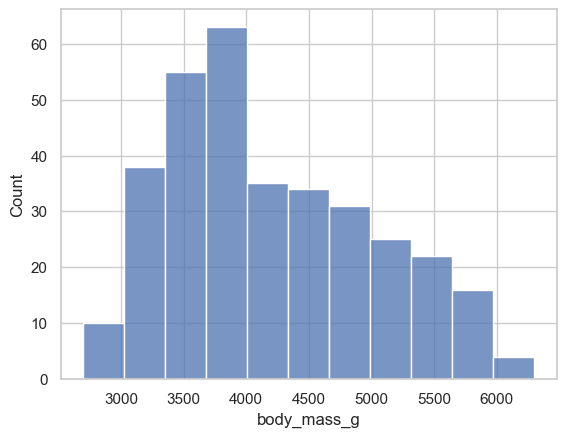

In [26]:
# Histogram of body mass
sns.histplot(data=penguins_clean, x='body_mass_g')

<Axes: xlabel='body_mass_g', ylabel='Count'>

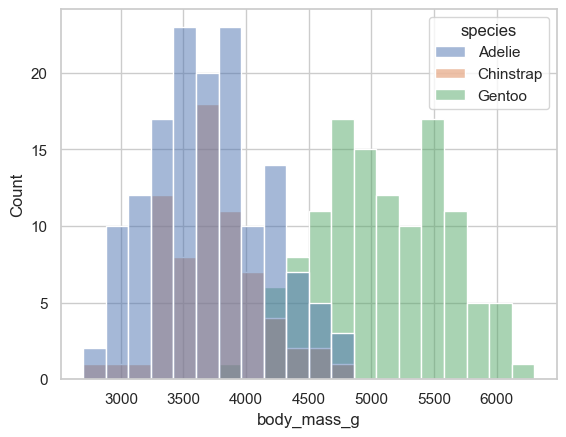

In [27]:
# Histogram by species
sns.histplot(data=penguins_clean, x='body_mass_g', hue='species', bins=20)

<Axes: xlabel='species', ylabel='body_mass_g'>

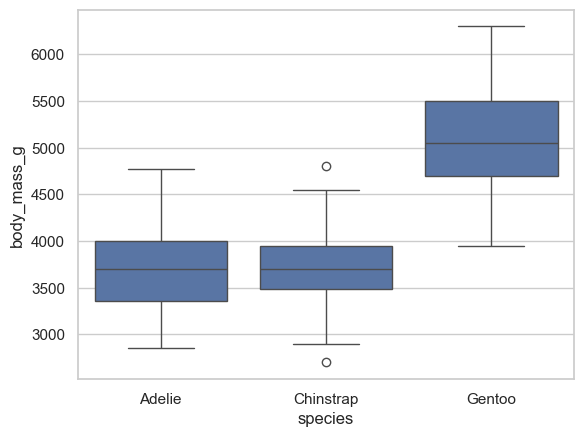

In [28]:
# Box plot: body mass per species
sns.boxplot(data=penguins_clean, x='species', y='body_mass_g')

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

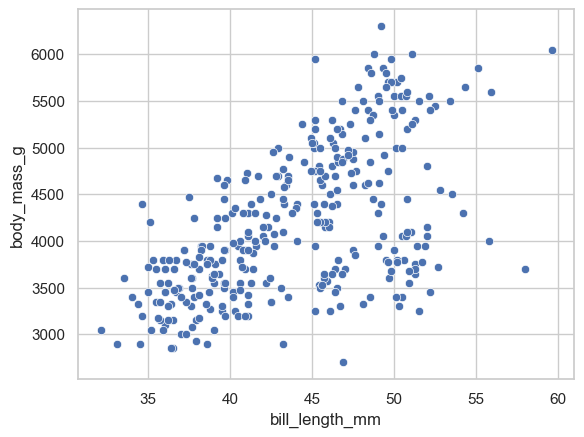

In [29]:
# Scatter plot: bill length vs body mass
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='body_mass_g')

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

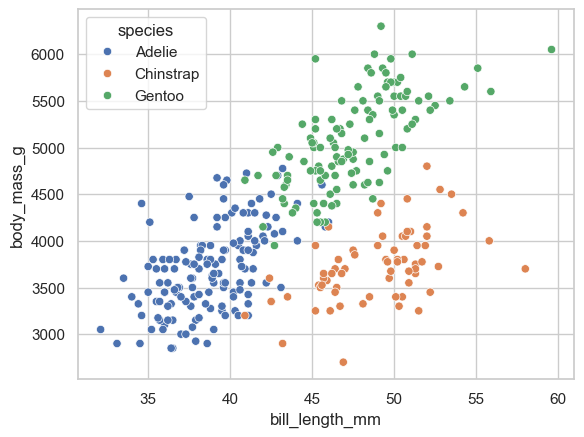

In [30]:
# Scatter plot colored by species
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='body_mass_g', hue='species')

---
## Part 2: Correlation

**Correlation** measures how strongly two variables are related.

**Pearson correlation coefficient (r)**:
- r = +1: Perfect positive correlation
- r = 0: No correlation
- r = -1: Perfect negative correlation

In [ ]:
stats.pearsonr?

In [51]:
a = [0,4,17, 28, 35]
b = [6, 5, 4, 3, 20]
r, p_value = stats.pearsonr(a, b)
print("Correlation (r):", round(r, 3), 'blabla')
print("P-value:", p_value)

Correlation (r): 0.554 blabla
P-value: 0.33297026052026185


In [52]:
# Is there a correlation between bill (ράμφος) length and body mass?
r, p_value = stats.pearsonr(penguins_clean['bill_length_mm'], penguins_clean['body_mass_g'])

print("Correlation (r):", round(r, 3))
print("P-value:", p_value)

Correlation (r): 0.589
P-value: 1.5386135144859492e-32


**Interpretation?**

In [53]:
# Correlation between flipper (φτερά) length and body mass?
r2, p2 = stats.pearsonr(penguins_clean['flipper_length_mm'], penguins_clean['body_mass_g'])

print("Correlation (r):", round(r2, 3))
print("P-value:", p2)

Correlation (r): 0.873
P-value: 3.1328362509720613e-105


In [54]:
5e-2

0.05

Does flipper length have stronger correlation with body mass?

### Correlation Matrix

We can calculate correlations between all numeric variables at once.

In [35]:
penguins_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [55]:
# Select only numeric columns
numeric_cols = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

numeric_cols

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [56]:
# Correlation matrix
corr_m = numeric_cols.corr()

In [58]:
corr_m

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
sns.heatmap?

<Axes: >

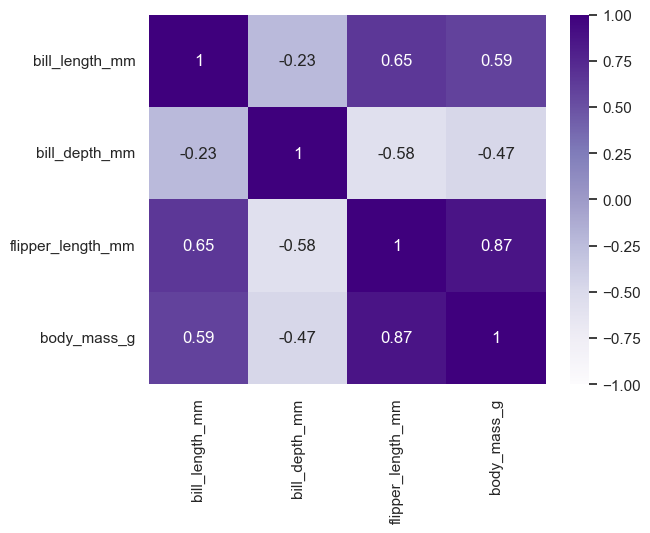

In [60]:
# Visualize as heatmap
sns.heatmap(corr_m, annot=True, cmap='Purples', vmin=-1, vmax=1)

**Reading the heatmap:**
- Diagonal is always 1 (variable correlates perfectly with itself)
- Red = positive correlation
- Blue = negative correlation
- Strongest correlation: flipper_length vs body_mass (0.87)

---
## Part 3: Linear Regression

**Linear regression** fits a straight line to data:

$$y = mx + b$$

- m = slope
- b = intercept

Let's predict body mass from flipper length.

In [39]:
# Check stats.linregress function
stats.linregress?

Signature: stats.linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length N.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2xN array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

    .. deprecated:: 1.14.0
        Inference of the two sets of measurements from a single argument `x`
        is deprecated will result in an error in SciPy 1.16.0; the sets
        must be specified separately as `x` and `y`.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are availab

In [40]:
# Linear regression: flipper length → body mass
result = stats.linregress(penguins_clean['flipper_length_mm'], penguins_clean['body_mass_g'])

print("Slope:", round(result.slope, 2))
print("Intercept:", round(result.intercept, 2))
print("R-squared:", round(result.rvalue**2, 3))
print("P-value:", result.pvalue)

Slope: 50.15
Intercept: -5872.09
R-squared: 0.762
P-value: 3.1328362509719978e-105


**Interpretation?**

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

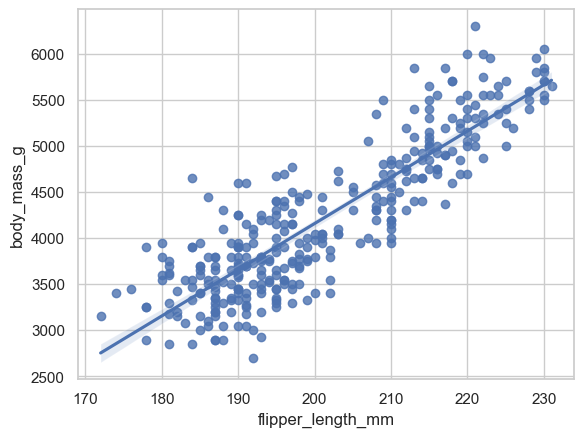

In [41]:
# Plot with regression line
sns.regplot(data=penguins_clean, x='flipper_length_mm', y='body_mass_g')

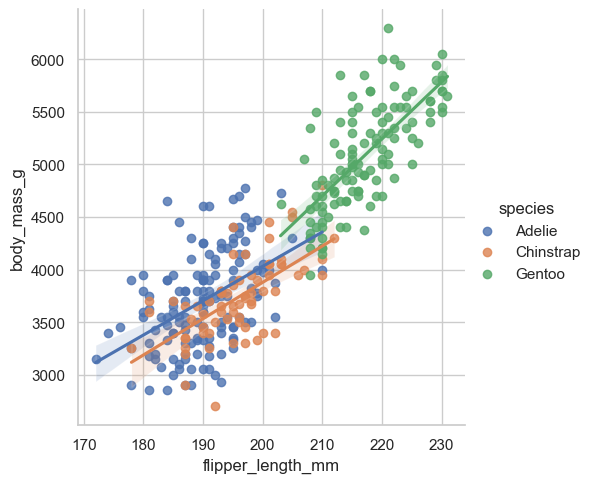

In [42]:
# Regression per species
sns.lmplot(data=penguins_clean, x='flipper_length_mm', y='body_mass_g', hue='species')

### Making Predictions

In [43]:
# Predict body mass for a penguin with flipper length = 200mm
flipper = 200

predicted_mass = result.slope * flipper + result.intercept

print("Flipper length:", flipper, "mm")
print("Predicted body mass:", round(predicted_mass), "g")

Flipper length: 200 mm
Predicted body mass: 4159 g


In [44]:
# Predict for multiple values
flippers = [180, 190, 200, 210, 220]

for f in flippers:
    mass = result.slope * f + result.intercept
    print("Flipper:", f, "mm → Mass:", round(mass), "g")

Flipper: 180 mm → Mass: 3155 g
Flipper: 190 mm → Mass: 3657 g
Flipper: 200 mm → Mass: 4159 g
Flipper: 210 mm → Mass: 4660 g
Flipper: 220 mm → Mass: 5162 g


---
## Part 5: Summary

**Pandas:**
- Load data: `sns.load_dataset()` or `pd.read_csv()`
- View data: `.head()`, `.shape`, `.columns`
- Handle missing: `.isna()`, `.dropna()`
- Statistics: `.mean()`, `.median()`, `.std()`, `.describe()`
- Filter: `df[df['col'] > value]`
- Group: `df.groupby('col')['other'].mean()`

**Correlation:**
- `stats.pearsonr(x, y)` → (r, p-value)
- `df.corr()` → correlation matrix
- `sns.heatmap()` to visualize

**Linear Regression:**
- `stats.linregress(x, y)` → slope, intercept, r, p-value
- `sns.regplot()` → scatter + regression line
- Predict: `y = slope * x + intercept`

---
## Exercises

### Exercise 1
Find the mean bill length for each species.

In [62]:
penguins_clean.groupby(['species', 'island'])['bill_length_mm'].mean()

species    island   
Adelie     Biscoe       38.975000
           Dream        38.520000
           Torgersen    39.038298
Chinstrap  Dream        48.833824
Gentoo     Biscoe       47.568067
Name: bill_length_mm, dtype: float64

### Exercise 2
Calculate the correlation between bill_length_mm and bill_depth_mm for Adelie penguins only.

In [68]:
penguins_clean['species'] == 'Adelie'

0       True
1       True
2       True
4       True
5       True
       ...  
338    False
340    False
341    False
342    False
343    False
Name: species, Length: 333, dtype: bool

In [64]:
adelie = penguins_clean[(penguins_clean['species'] == 'Adelie')]

In [65]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


### Exercise 3
Using our linear regression (flipper → body mass), predict the body mass of a penguin with flipper length 230mm.

In [47]:
# YOUR CODE HERE


---
## Resources

- [Palmer Penguins Dataset](https://allisonhorst.github.io/palmerpenguins/)
- [Seaborn Regression Tutorial](https://seaborn.pydata.org/tutorial/regression.html)
- [SciPy linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

---

**Next class (26/1/26):** Permutation tests, p-value estimation

---
*NEURO-105 - MSc in Neurosciences, University of Crete*